<a href="https://colab.research.google.com/github/LeeHuiJong/SkillTreePython-DataAnalysis/blob/main/ch03_02_%EC%97%AC%EB%9F%AC%EA%B0%80%EC%A7%80_%ED%99%95%EB%A5%A0%EB%B6%84%ED%8F%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch03.02. 여러가지 확률 분포
---
* 날짜:
* 이름:

## 학습내용
    * 연속형 확률변수 -> 확률 밀도 함수 -> 연속형 확률 분포
      - 균등 분포
      - 정규 분포
      - 지수 분포
      - 감마 분포
      - 베타 분포
      - 카이제곱 분포
    * 이산형 확률변수 -> 확률 질량 함수 -> 이산형 확률 분포
      - 베르누이 분포
      - 이항분포
      - 카테고리 확률 분포
      - 포아송 분포
      - 기하 분포
      - 음이항 분포
      - 초기하 분포


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
from scipy.stats import * # 모든 함수 추출

## 연속형 확률 분포
---



### **| 정규분포**

\begin{align}
\mathcal{N}(x; \mu, \sigma^2) = \dfrac{1}{\sqrt{2\pi\sigma^2}} \exp \left(-\dfrac{(x-\mu)^2}{2\sigma^2}\right)
\end{align}

```
sp.stats.norm(mu, std)
```

In [ ]:
# 인풋은 x ; 뒤는 파라미터(모수)

In [ ]:
mu, std = 0, 1 # 표준 정규분포 # 여기서 파생된것이 카이제곱, 감마분포
norm = sp.stats.norm(mu, std)

* 확률 분포


In [ ]:
X = np.linspace(-5,5,10) # -5부터 5까지 10개
P_X = norm.pdf(X)
print(P_X) # pdf= 밀도함수

[1.48671951e-06 2.07440309e-04 8.42153448e-03 9.94771388e-02
 3.41892294e-01 3.41892294e-01 9.94771388e-02 8.42153448e-03
 2.07440309e-04 1.48671951e-06]


* 누적 확률 분포


In [ ]:
F_X = norm.cdf(X)
print(F_X)

[2.86651572e-07 5.03521029e-05 2.73660179e-03 4.77903523e-02
 2.89257361e-01 7.10742639e-01 9.52209648e-01 9.97263398e-01
 9.99949648e-01 9.99999713e-01]


* 표본 추출



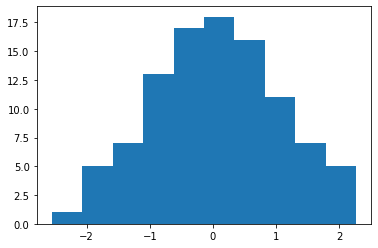

In [ ]:
rvs = norm.rvs(100,random_state=0)
_=plt.hist(rvs)

#### **예제 01. 파라미터 변경-평균**

* 표준편차 `1`, 평균이 각각 `0.5, 1, 2, 4`인 확률분포와 확률누적분포를 그리세요.

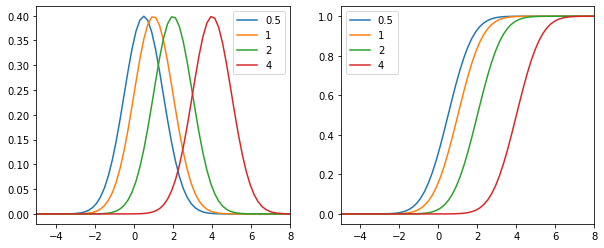

In [ ]:
mus = [0.5 ,1, 2, 4]
std = 1
X = np.linspace(-10,10,100)

fig, axes = plt.subplots(1,2, figsize=(10,4))
for mu in mus:
  norm= sp.stats.norm(mu, std)
  P_X = norm.pdf(X)  # 확률 밀도 함수
  F_X = norm.cdf(X)  # 누적 확률 함수
  axes[0].plot(X, P_X) # X에 대한 확률 값 그래프
  axes[1].plot(X, F_X) # X에 대한 누적 값 그래프
  axes[0].set_xlim(-5,8) # x 값의 범위 조절
  axes[1].set_xlim(-5,8)
axes[0].legend(mus) # 라벨
axes[1].legend(mus)

#### **예제 02. 파라미터 변경-표준편차**

* 평균 `0`, 표준편차가 각각 `0.5, 1, 2, 4`인 확률분포와 확률누적분포를 그리세요.

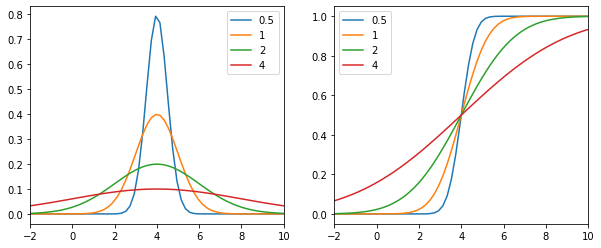

In [ ]:
mus1 = 0
std1 =[0.5, 1, 2, 4]
X = np.linspace(-10,10,100)

fig, axes = plt.subplots(1,2, figsize=(10,4))
for stds in std1:
  norm= sp.stats.norm(mu, stds)
  P_X = norm.pdf(X)  # 확률 밀도 함수
  F_X = norm.cdf(X)  # 누적 확률 함수
  axes[0].plot(X, P_X) # X에 대한 확률 값 그래프
  axes[1].plot(X, F_X) # X에 대한 누적 값 그래프
  axes[0].set_xlim(-2,10) # x 값의 범위 조절
  axes[1].set_xlim(-2,10)
axes[0].legend(std1) # 라벨
axes[1].legend(std1)

#### **예제 03. 손의 길이**

성인 손의 길이의 평균은 15.2cm 이고 표준편차는 2.5cm를 따른다고 합니다. 1000명을 표본으로 뽑고 히스토 그램을 그리세요.

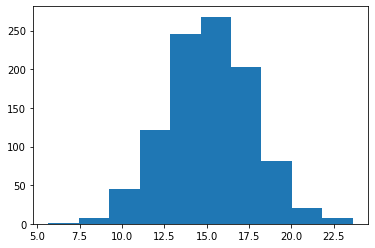

In [ ]:
norm = sp.stats.norm(15.2, 2.5)
_=plt.hist(norm.rvs(1000))

### **| 카이제곱 분포**

\begin{align}
\chi^2(x; \nu) = \frac{x^{(\nu/2-1)} e^{-x/2}}{2^{\nu/2} \Gamma\left(\frac{\nu}{2}\right)}
\end{align}

```
sp.stats.chi2(df=df)
```

In [ ]:
df=1
chi = sp.stats.chi2(df)

* 확률 분포


In [ ]:
X = np.linspace(-5,5,10)

In [ ]:
P_X = chi.pdf(X)
print(P_X)

[0.         0.         0.         0.         0.         0.40542354
 0.13429926 0.05968628 0.02894248 0.01464498]


* 누적 확률 분포


In [ ]:
F_X = chi.cdf(X)
print(F_X)

[0.         0.         0.         0.         0.         0.54394346
 0.8032944  0.9044193  0.95139343 0.97465268]


* 표본 추출


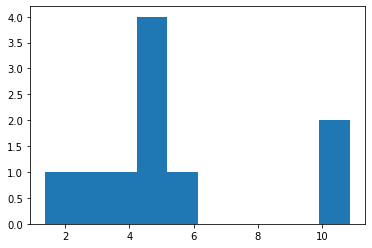

In [ ]:
rvs = chi2.rvs(10,random_state=0)
_=plt.hist(rvs)

#### **예제 01. 파라미터 변경-자유도**

* 자유도(df) 값이 각각 `1,2,3,4`인 카이제곱분포와 누적 확률 분포를 그리세요.

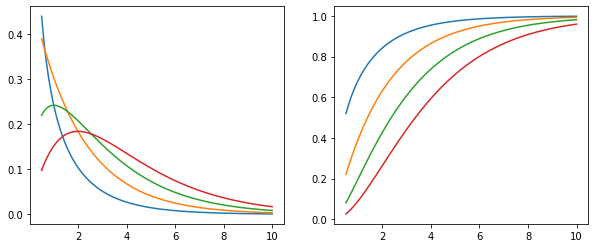

In [ ]:
dfs =[1, 2, 3, 4]
X = np.linspace(0.5,10,100)

fig, axes = plt.subplots(1,2, figsize=(10,4))
for df in dfs:
  chi= sp.stats.chi2(df)
  P_X = chi.pdf(X)  # 확률 밀도 함수
  F_X = chi.cdf(X)  # 누적 확률 함수
  axes[0].plot(X, P_X) # X에 대한 확률 값 그래프
  axes[1].plot(X, F_X) # X에 대한 누적 값 그래프
  #axes[0].set_xlim(-2,10) # x 값의 범위 조절
  #axes[1].set_xlim(-2,10)
#axes[0].legend(std1) # 라벨
#axes[1].legend(std1)

### **| 감마분포**

\begin{align}
\text{Gam}(x;a,b) = \frac{1}{\Gamma(a)} b^a x^{a-1}e^{-bx}
\end{align}

```
sp.stats.gamma(a=a, b=1)
```

In [ ]:
a=1
gamma = sp.stats.gamma(a, 1)

* 확률 분포

In [ ]:
X = np.linspace(-5,5,10)

In [ ]:
P_X = gamma.pdf(X)
print(P_X)

[0.         0.         0.         0.         0.         0.
 0.51341712 0.16901332 0.055638   0.01831564]


* 누적 확률 분포


In [ ]:
F_X = gamma.cdf(X)
print(F_X)

[0.         0.         0.         0.         0.         0.
 0.48658288 0.83098668 0.944362   0.98168436]


* 표본 추출

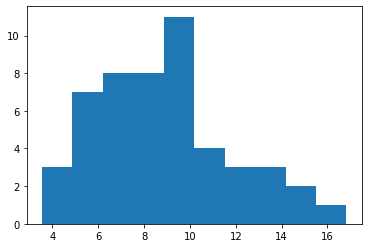

In [ ]:
rvs = gamma.rvs(50,random_state=0)
_=plt.hist(rvs)

#### **예제 01. 파라미터 변경-a**

* a 값이 각각 `1,2,4,8`인 감마 분포와 누적 확률 분포를 그리세요.

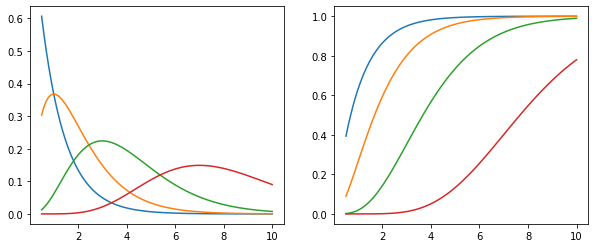

In [ ]:
a1 = [1, 2, 4, 8]
X = np.linspace(0.5,10,100)

fig, axes = plt.subplots(1,2, figsize=(10,4))
for a in a1:
  gamma = sp.stats.gamma(a)
  P_X = gamma.pdf(X)  # 확률 밀도 함수
  F_X = gamma.cdf(X)  # 누적 확률 함수
  axes[0].plot(X, P_X) # X에 대한 확률 값 그래프
  axes[1].plot(X, F_X) # X에 대한 누적 값 그래프
  #axes[0].set_xlim(-2,10) # x 값의 범위 조절
  #axes[1].set_xlim(-2,10)
#axes[0].legend(std1) # 라벨
#axes[1].legend(std1)

### **| 베타분포**

In [ ]:
beta = sp.stats.beta(a,b)

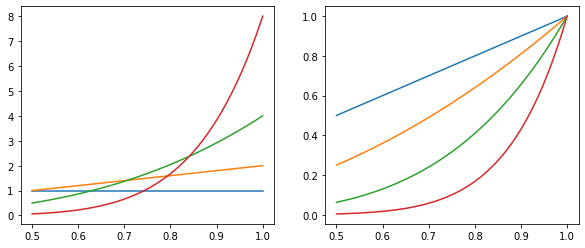

In [ ]:
a1 = [1, 2, 4, 8]
b = 1
X = np.linspace(0.5,1,100)

fig, axes = plt.subplots(1,2, figsize=(10,4))
for a in a1:
  beta = sp.stats.beta(a,b)
  P_X = beta.pdf(X)  # 확률 밀도 함수
  F_X = beta.cdf(X)  # 누적 확률 함수
  axes[0].plot(X, P_X) # X에 대한 확률 값 그래프
  axes[1].plot(X, F_X) # X에 대한 누적 값 그래프
  #axes[0].set_xlim(-2,10) # x 값의 범위 조절
  #axes[1].set_xlim(-2,10)
#axes[0].legend(std1) # 라벨
#axes[1].legend(std1)

### **| 균등분포**

In [ ]:
uniform= sp.stats.uniform(a,b)

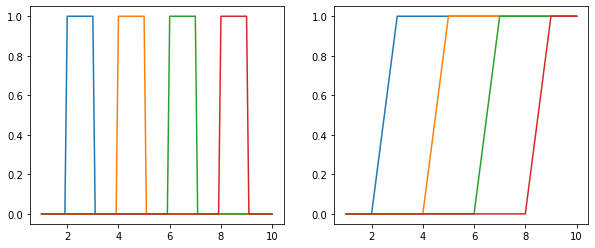

In [ ]:
a1 = [2, 4, 6, 8]
b = 1
X = np.linspace(1,10,100)

fig, axes = plt.subplots(1,2, figsize=(10,4))
for a in a1:
  beta = sp.stats.uniform(a,b)
  P_X = beta.pdf(X)  # 확률 밀도 함수
  F_X = beta.cdf(X)  # 누적 확률 함수
  axes[0].plot(X, P_X) # X에 대한 확률 값 그래프
  axes[1].plot(X, F_X) # X에 대한 누적 값 그래프
  #axes[0].set_xlim(-2,10) # x 값의 범위 조절
  #axes[1].set_xlim(-2,10)
#axes[0].legend(std1) # 라벨
#axes[1].legend(std1)

### **| 지수분포**

In [ ]:
expon = sp.stats.expon(a,b)

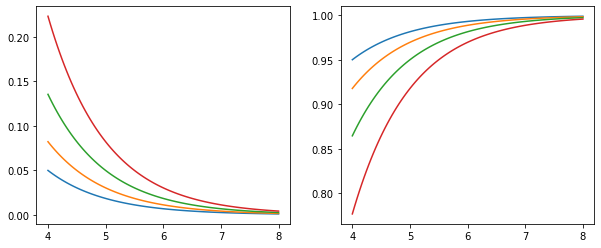

In [ ]:
a1 = [1, 1.5, 2, 2.5]
b = 1
X = np.linspace(4,8,100)

fig, axes = plt.subplots(1,2, figsize=(10,4))
for a in a1:
  expon = sp.stats.expon(a,b)
  P_X = expon.pdf(X)  # 확률 밀도 함수
  F_X = expon.cdf(X)  # 누적 확률 함수
  axes[0].plot(X, P_X) # X에 대한 확률 값 그래프
  axes[1].plot(X, F_X) # X에 대한 누적 값 그래프
  #axes[0].set_xlim(-2,10) # x 값의 범위 조절
  #axes[1].set_xlim(-2,10)
#axes[0].legend(std1) # 라벨
#axes[1].legend(std1)

## 이산형 확률 분포
---

### |  **베르누이 분포**

\begin{split}
\begin{align}
\text{Bern}(x;\mu) = 
\begin{cases} 
\mu   & \text{if }x=1, \\
1-\mu & \text{if }x=0
\end{cases}
\end{align}
\end{split}

* 기본사용

```
mu = 0.5
rv = sp.stats.bernoulli(mu)
```

In [ ]:
# 두개의 확률만 존재 ex) 성공 0.2 실패 0.8  ; 왼쪽은 인풋값 오른쪽은 모수

In [3]:
# 동전 던지기 앞뒤 확률 같음
bern = sp.stats.bernoulli(0.5)

* 확률 분포


In [6]:
# 확률 반환
bern.pmf([0, 1, 2])
# 베르누이 함수는 x 가 0과 1일때만 확률값을 가지기 때문에 2의 확률이 0다.

array([0.5, 0.5, 0. ])

* 누적 확률 분포


In [7]:
bern.cdf([0, 1]) # 누적확률이기 때문에 마지막 1일때는 모든 확률의 합인 1이 나온다.

array([0.5, 1. ])

* 표본 추출

In [8]:
bern.rvs(20)

array([1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0])

#### **예제 01. 동전 던지기**

동전을 던져서 앞면이 나온 확률



#### **예제 02. 주사위 굴리기**

주사위 던져서 6이 나온 확률


[0.83333333 0.16666667]


([<matplotlib.axis.XTick at 0x7ffa713eb0d0>,
 [Text(0, 0, 'Fail'), Text(0, 0, 'Success')])

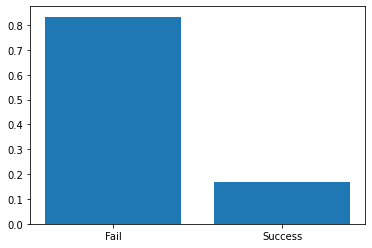

In [12]:
# 확률 분포 그리고, 누적확률 분포 그리기
# 6이 나올 확률
mu = 1/6
x = [0,1]
label = ['Fail', 'Success']
bern = sp.stats.bernoulli(mu)
# 확률 함수
P = bern.pmf([0, 1])
print(P)
plt.bar(x, P)
plt.xticks(x, labels=label)

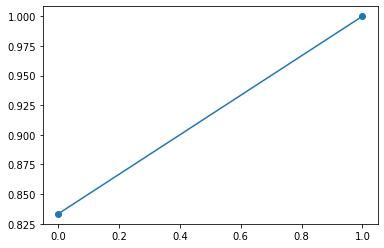

In [14]:
# 누적 확률 함수
F = bern.cdf(x)
plt.plot(x, F, marker='o')

#### **예제 03. 같은 생일**

두 사람의 생일 월(月)이 같을 확률


In [26]:
12*12

144

[0.99305556 0.00694444]


([<matplotlib.axis.XTick at 0x7ffa71194d90>,
 [Text(0, 0, 'Fail'), Text(0, 0, 'Success')])

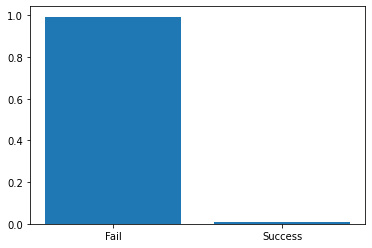

In [28]:
mu = 1/144
x = [0,1]
label = ['Fail', 'Success']
bern = sp.stats.bernoulli(mu)
P = bern.pmf([0, 1])
print(P)
plt.bar(x, P)
plt.xticks(x, labels=label)

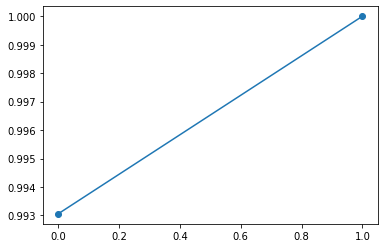

In [29]:
F = bern.cdf(x)
plt.plot(x, F, marker='o')

#### **예제 04. 주머니 공**
주머니에 5개의 공이 들어있고 3개는 빨강, 2개는 하양이다. 공 2개를 뽑았을 때 색깔이 모두 다를 확률은?

[0.76 0.24]


([<matplotlib.axis.XTick at 0x7ffa710e9dd0>,
 [Text(0, 0, 'Fail'), Text(0, 0, 'Success')])

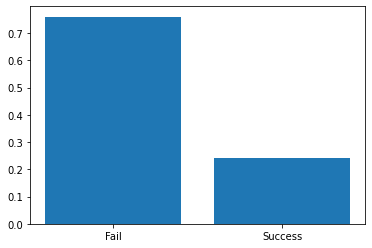

In [30]:
mu = 6/25
x = [0,1]
label = ['Fail', 'Success']
bern = sp.stats.bernoulli(mu)
P = bern.pmf([0, 1])
print(P)
plt.bar(x, P)
plt.xticks(x, labels=label)

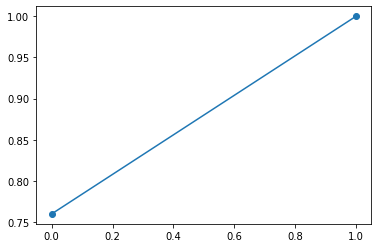

In [31]:
F = bern.cdf(x)
plt.plot(x, F, marker='o')

### |  **이항분포**

\begin{align}
\text{Bin}(x;N,\mu) = \binom N x \; \mu^x(1-\mu)^{N-x}
\end{align}


```
sp.stats.binom(N, mu)
```

* 확률 분포


* 누적 확률  분포

* 확률 변수 표본 추출


In [15]:
# x 는 주어진 데이터이고 ; 뒤의 파라미터가 중요하다. mu 는 관심있는 사건 (확률)
# 베르누이 시행을 N번 한 결과의 확률
# 동전 던지기를 10번 시행중 앞면이 나온 확률
N, mu = 10, 0.5
binom = sp.stats.binom(N, mu)

In [16]:
# x는 앞면이 나오는 횟수 (0, 1, 2.....10)
# P는 각 횟수에 대한 확률
binom.pmf([np.arange(11)])

array([[0.00097656, 0.00976563, 0.04394531, 0.1171875 , 0.20507813,
        0.24609375, 0.20507813, 0.1171875 , 0.04394531, 0.00976563,
        0.00097656]])

In [17]:
binom.cdf([np.arange(11)])

array([[9.76562500e-04, 1.07421875e-02, 5.46875000e-02, 1.71875000e-01,
        3.76953125e-01, 6.23046875e-01, 8.28125000e-01, 9.45312500e-01,
        9.89257812e-01, 9.99023438e-01, 1.00000000e+00]])

In [18]:
binom.rvs(100)

array([3, 6, 3, 7, 5, 4, 3, 5, 8, 8, 3, 6, 3, 2, 2, 8, 4, 5, 5, 9, 2, 5,
       7, 8, 5, 2, 5, 6, 5, 4, 6, 5, 5, 3, 6, 3, 6, 5, 3, 8, 6, 5, 4, 5,
       6, 7, 6, 7, 6, 3, 8, 3, 4, 6, 7, 5, 5, 6, 6, 3, 6, 4, 6, 7, 6, 4,
       7, 5, 4, 6, 5, 4, 6, 6, 3, 5, 5, 5, 4, 6, 6, 6, 5, 2, 5, 5, 4, 4,
       4, 5, 4, 6, 5, 5, 5, 5, 7, 4, 5, 8])

#### **예제 01. 동전 던지기**

* 동전을 1번 던졌을 때 앞면이 나온 횟수의 확률분포



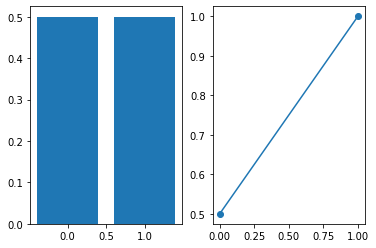

In [92]:
binom = sp.stats.binom(1, 1/2) # 한번 동전을 던졌으므로 확률은 0.5
x = np.arange(2)

plt.subplot(121)
plt.bar(x, binom.pmf(x))

plt.subplot(122)
plt.plot(x, binom.cdf(x), marker='o')

* 동전을 10번 던졌을 때 앞면이 나온 횟수의 확률분포

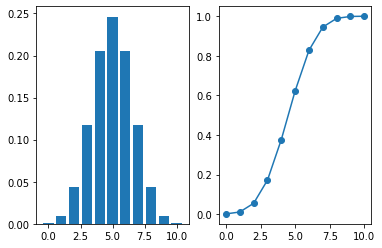

In [93]:
binom = sp.stats.binom(10, 1/2) # 10번 동전을 던져서 앞면 나올 확률
x = np.arange(11)

plt.subplot(121)
plt.bar(x, binom.pmf(x))

plt.subplot(122)
plt.plot(x, binom.cdf(x), marker='o')

#### **예제 02. 주사위 굴리기**

* 주사위를 1번 던져서 짝수가 나온 횟수의 분포

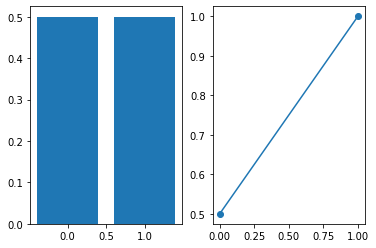

In [94]:
binom = sp.stats.binom(1, 1/2) # 홀짝 주사위 비율이 같으므로 확률은 0.5로 같다.
x = np.arange(2)

plt.subplot(121)
plt.bar(x, binom.pmf(x))

plt.subplot(122)
plt.plot(x, binom.cdf(x), marker='o')

* 주사위를 6번 던져서 짝수가 나온 횟수의 분포

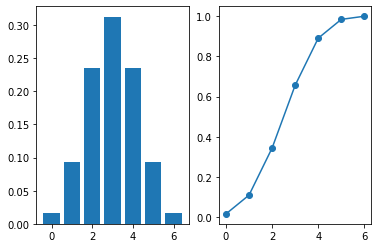

In [91]:
binom = sp.stats.binom(6, 1/2)
x = np.arange(7) # 주사위를 6번 던지는데 왜 7로 설정하는 건가? 한번도 안나올 확률이 존재하기 때문 위에서 x를 +1로 설정해주는 것도 동일한 이유다.

plt.subplot(121)
plt.bar(x, binom.pmf(x))

plt.subplot(122)
plt.plot(x, binom.cdf(x), marker='o')

* 주사위를 20번 던져서 짝수가 나온 횟수의 분포

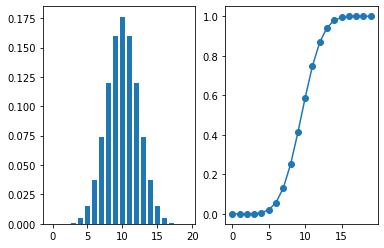

In [95]:
binom = sp.stats.binom(20, 1/2)
x = np.arange(20)

plt.subplot(121)
plt.bar(x, binom.pmf(x))

plt.subplot(122)
plt.plot(x, binom.cdf(x), marker='o')

* 주사위를 1번 던져서 6이 나온 횟수의 분포

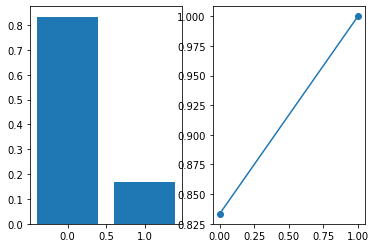

In [96]:
binom = sp.stats.binom(1, 1/6) # 6이 나올 확률은 1/6 
x = np.arange(2)

plt.subplot(121)
plt.bar(x, binom.pmf(x))

plt.subplot(122)
plt.plot(x, binom.cdf(x), marker='o')

* 주사위를 6번 던져서 6이 나온 횟수의 분포

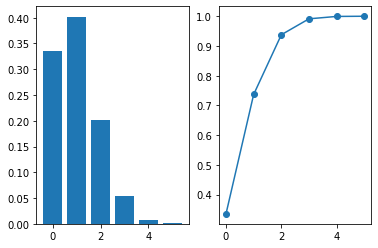

In [97]:
binom = sp.stats.binom(6, 1/6)
x = np.arange(6)

plt.subplot(121)
plt.bar(x, binom.pmf(x))

plt.subplot(122)
plt.plot(x, binom.cdf(x), marker='o')

* 주사위를 20번 던져서 6이 나온 횟수의 분포

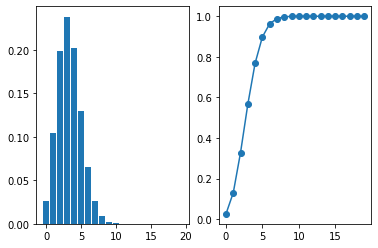

In [98]:
binom = sp.stats.binom(20, 1/6)
x = np.arange(20)

plt.subplot(121)
plt.bar(x, binom.pmf(x))

plt.subplot(122)
plt.plot(x, binom.cdf(x), marker='o')

### **| 카테고리 확률분포**

\begin{split} 
\begin{align}
\text{Cat}(x;\mu) = 
\begin{cases}
\mu_1 & \text{if } x = (1, 0, 0, \cdots, 0) \\
\mu_2 & \text{if } x = (0, 1, 0, \cdots, 0) \\
\mu_3 & \text{if } x = (0, 0, 1, \cdots, 0) \\
\vdots & \vdots \\
\mu_K & \text{if } x = (0, 0, 0, \cdots, 1) \\
\end{cases}
\end{align}
\end{split}


```
sp.stats.multinomial(1, mu)
```

In [22]:
# x=(1,0,0,⋯,0) 원-핫 인코딩
# multinomial(N, mu)
# N : N번 시행 -> 1로 고정
# mus : 카테고리 별 확률 , 벡터 (리스트, 어레이)

mult = sp.stats.multinomial(1, [1/3, 1/3, 1/3])

* 확률 분포


In [24]:
# 베르누이 시행에서
# xs = [0, 1] ->p(xs) = [0.6, 0.4]
# x값이 0일 때, 확률 0.6 이다.
# 카테고리 시행
# x 값이 'A' 일때, 'B' 일때, 'C' 일때
# 원-핫 인코딩 : 각 클래스를 벡터로 표현 하는것
# 'A' =[1,0,0], 'B' = [0,1,0], 'C' = [0,0,1]

print( mult.pmf([0,1,0]) ) # 'B'가 나올 확률
one_h = [[1,0,0],
         [0,1,0],
         [0,0,1]]
mult.pmf(one_h)

0.3333333333333333


array([0.33333333, 0.33333333, 0.33333333])

* 표본 추출


In [25]:
mult.rvs(10)

array([[1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0]])

In [ ]:
# 카테고리이기 때문에 숫자값으로 표현된 누적값이 없다.

#### **예제 01.공정하지 않은 주사위**  ★★★

* 주사위의 짝수 면이 나올 확률이 홀수 면이 나올 확률의 2배일 때 확률분포를 그래세요.

<function matplotlib.pyplot.show>

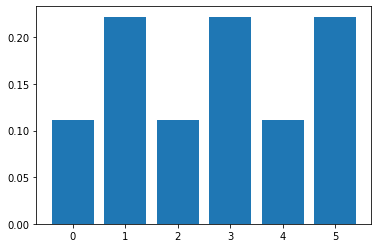

In [85]:
mult = sp.stats.multinomial(1, [1/9, 2/9, 1/9, 2/9, 1/9, 2/9]) # 각 주사위 값의 확률이 다르게 정해진다.
x = np.arange(6)
x_oneh = pd.get_dummies(x).values  # dummies 함수를 사용해 카테고리를 원_핫 인코딩한다. 자주 쓰일것 같기때문에 기억해둘것 ★★★

plt.bar(x, mult.pmf(x_oneh))
plt.show

In [67]:
xs = np.arange(6)
xs_oneh = pd.get_dummies(xs).values

In [68]:
xs_oneh

array([[1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1]], dtype=uint8)

#### **예제 02. 주머니 공**

주머니 안에 빨간색 5개, 노란색, 3개 초록색 2개 공이 들어 있을 때 공 한개를 뽑을 때 나오는 색깔의 확률 분포를 그리세요.

<function matplotlib.pyplot.show>

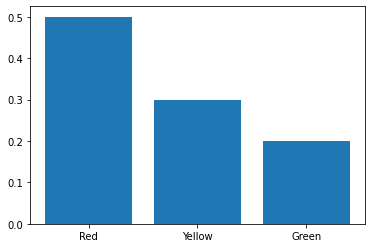

In [84]:
mult = sp.stats.multinomial(1, [5/10, 3/10, 2/10])
label = ['Red', 'Yellow', 'Green'] # 빨강, 노랑, 초록  세가지 라벨을 정해준다.
x = np.arange(3)
x_oneh = pd.get_dummies(x).values # 세가지 카테고리를 원핫 인코딩

plt.bar(x, mult.pmf(x_oneh))
plt.xticks(x, labels=label)
plt.show

#### **예제 03. 선호 자리**

교실에 5개의 자리가 있고 학생이 x번째 자리에 앉을 확률이 $f(X=x)=\frac{1}{2^{(x+1)}}$ 로 주어졌습니다. 확률 분포를 그리세요.

<BarContainer object of 6 artists>

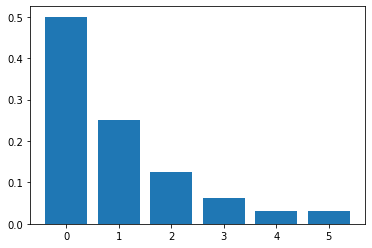

In [82]:
mult = sp.stats.multinomial(1, [1/2**1, 1/2**2, 1/2**3, 1/2**4, 1/2**5, 1/2**6]) # 각각의 자리에 앉을 확률들 하나도 안 앉을 확률 부터 시작해 5번째에 앉을 확률까지
x = np.arange(6)
x_oneh = pd.get_dummies(x).values

plt.bar(x, mult.pmf(x_oneh)) # 자리가 증가할때 마다 점점 확률이 줄어드는 것을 볼 수 있다.

In [89]:
1/2**1+1/2**2+1/2**3+1/2**4+1/2**5+1/2**6+1/2**7+1/2**8+1/2**9

0.998046875